# Milestone 1
## Substance, Alcohol, and Drugs Use Analysis

`Nurrahmawati Batch 002`

## Introductions

You are a data analyst at a company, one of your friends who is part of a Non-Governmental Organization (NGO) comes asking assistance in analyzing data on substance, alcohol, and drug users from various countries. NGOs have a mission to reduce the death rate from substance, alcohol, and drug users. You are asked to provide your analysis and advice in which state they should provide funding from these donors.

There are many things to consider in completing this mission so your analysis and advice on this project is very important.

## Problem Statement

Non-Governmental Organizations (NGO) have a mission to reduce the death rate for substance, alcohol, and drug use by deciding which countries have the most impact that will be chosen to carry out the mission program in the next 1 year.

## Problem Description

1. How many people die from substance use each year?
2. What age has the highest average percentage of deaths due to substance use disorders - alcohol and substance disorders each year?
3. How has the prevalence of substance use disorders – alcohol and drug addiction – different between men and women in the last five years?
4. During the last five years, which country has the highest number of users of substance, alcohol, and drug users?
5. What type of drug has the highest percentage of deaths in the last five years in the country?
6. In what year did Scotland experience a decrease in the average percentage of substance, alcohol, and drug users?
7. What is the central tendency of this data analysis?
8. Do countries with high rates of alcoholism also have high rates of substance use disorders? Or does a high prevalence in one mean a low prevalence in the other?
9. Does the average percentage of substance use disorders, alcoholism, and drugs have a significant difference or not in Scotland?


### Data Loading

#### importing libraries

In [341]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Dataframe is downloaded from kaggle

link: https://www.kaggle.com/datasets/programmerrdai/drugs-use?select=death-rates-substance-disorders.csv

#### loading dataframe

I am loading a dataframe with as many as 8 data in csv format whose data is sourced from kaggle

In [378]:
df_1 = pd.read_csv('alcohol-drug-use-disorders-share-total-disease.csv')
df_2 = pd.read_csv('alcohol-or-drug-use-disorders-male-vs-female.csv')
df_3 = pd.read_csv('death-rates-substance-disorders.csv')
df_4 = pd.read_csv('deaths-substance-disorders-age.csv')
df_5 = pd.read_csv('deaths-substance-disorders.csv')
df_6 = pd.read_csv('share-with-alcohol-or-drug-use-disorders.csv')
df_7 = pd.read_csv('share-with-alcohol-vs-drug-use-disorder.csv')
df_8 = pd.read_csv('substances-risk-factor-vs-direct-deaths.csv')

Then I checked the 8 data whether they have the same shape or not for further analysis

In [343]:
df_1.shape

(6840, 4)

In [344]:
df_2.shape

(6921, 6)

In [345]:
df_3.shape

(6840, 4)

In [346]:
df_4.shape

(6840, 8)

In [347]:
df_5.shape

(6840, 9)

In [348]:
df_6.shape

(6840, 4)

In [349]:
df_7.shape

(56395, 7)

In [350]:
df_8.shape

(6840, 8)

Based on the results of these checks, there are some data that do not have the same shape. So in this case I will combine the 8 data with the lowest shape, which is 6840 or equate the entity column with a left join

In [351]:
a = df_1.merge(df_2, on=['Entity', 'Code', 'Year'],  how='left')
b = a.merge(df_3, on=['Entity', 'Code', 'Year'],  how='left')
c = b.merge(df_4, on=['Entity', 'Code', 'Year'],  how='left')
d = c.merge(df_5, on=['Entity', 'Code', 'Year'],  how='left')
e = d.merge(df_6, on=['Entity', 'Code', 'Year'],  how='left')
f = e.merge(df_7, on=['Entity', 'Code', 'Year'],  how='left')
data = f.merge(df_8, on=['Entity', 'Code', 'Year'],  how='left')
data

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Substance use disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent),Continent_x,Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate),Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),...,Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Population (historical estimates),Continent_y,Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,0.187690,1.015688,0.771531,NaN,2.092769,13,51,...,0.884101,0.444036,0.454202,12412311.0,NaN,93,72,9723,174,356
1,Afghanistan,AFG,1991,0.193772,1.010653,0.762575,NaN,2.099186,14,52,...,0.877249,0.444250,0.447112,13299016.0,NaN,102,75,9918,188,364
2,Afghanistan,AFG,1992,0.204869,1.007116,0.755268,NaN,2.117551,14,53,...,0.872720,0.445501,0.441190,14485543.0,NaN,118,80,10386,211,376
3,Afghanistan,AFG,1993,0.206346,1.004760,0.747088,NaN,2.166435,15,55,...,0.867961,0.445958,0.435581,15816601.0,NaN,132,85,10992,232,389
4,Afghanistan,AFG,1994,0.200465,1.000058,0.741827,NaN,2.222371,15,57,...,0.863275,0.445779,0.431822,17075728.0,NaN,142,88,11466,247,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.583358,3.820410,1.002434,Africa,1.836849,10,70,...,2.281799,1.734969,0.599604,13814642.0,Africa,104,48,9862,1068,4854
6836,Zimbabwe,ZWE,2016,0.604536,3.725138,1.009508,NaN,1.867822,10,74,...,2.242275,1.689281,0.603658,14030338.0,NaN,110,49,9974,1042,4915
6837,Zimbabwe,ZWE,2017,0.626932,3.642301,1.019891,NaN,1.891200,11,77,...,2.210648,1.651805,0.608096,14236599.0,NaN,115,50,10060,1007,4992
6838,Zimbabwe,ZWE,2018,0.663348,3.709616,1.028126,NaN,1.917344,11,80,...,2.244607,1.686711,0.609065,14438812.0,NaN,121,51,10162,969,5044


The following is the display of the data results from the combination of the 8 data, we can see that the data to be analyzed further has 6840 rows and 29 columns

### Data cleaning

Before doing data analysis, I will delete unused columns first so that the next analysis is easier

In [352]:
data.drop(['Continent_x', 'Continent_y', 'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_x', 'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_x',
'DALYs (Disability-Adjusted Life Years) - Substance use disorders - Sex: Both - Age: All Ages (Percent)'], axis = 1, inplace = True)
data

,Entity,Code,Year,Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent),Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate),Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number),Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number),...,Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number),Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Population (historical estimates),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,1.015688,0.771531,2.092769,13,51,101,0,...,2,0.884101,0.444036,0.454202,12412311.0,93,72,9723,174,356
1,Afghanistan,AFG,1991,1.010653,0.762575,2.099186,14,52,111,0,...,2,0.877249,0.444250,0.447112,13299016.0,102,75,9918,188,364
2,Afghanistan,AFG,1992,1.007116,0.755268,2.117551,14,53,130,0,...,3,0.872720,0.445501,0.441190,14485543.0,118,80,10386,211,376
3,Afghanistan,AFG,1993,1.004760,0.747088,2.166435,15,55,148,0,...,3,0.867961,0.445958,0.435581,15816601.0,132,85,10992,232,389
4,Afghanistan,AFG,1994,1.000058,0.741827,2.222371,15,57,158,0,...,3,0.863275,0.445779,0.431822,17075728.0,142,88,11466,247,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,3.820410,1.002434,1.836849,10,70,71,0,...,7,2.281799,1.734969,0.599604,13814642.0,104,48,9862,1068,4854
6836,Zimbabwe,ZWE,2016,3.725138,1.009508,1.867822,10,74,75,0,...,7,2.242275,1.689281,0.603658,14030338.0,110,49,9974,1042,4915
6837,Zimbabwe,ZWE,2017,3.642301,1.019891,1.891200,11,77,78,0,...,8,2.210648,1.651805,0.608096,14236599.0,115,50,10060,1007,4992
6838,Zimbabwe,ZWE,2018,3.709616,1.028126,1.917344,11,80,81,0,...,8,2.244607,1.686711,0.609065,14438812.0,121,51,10162,969,5044


After deleting 5 unused columns, the data for analysis changed to 24 columns

In [353]:
data.isnull().sum()

Entity                                                                                    0
Code                                                                                    690
Year                                                                                      0
Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent)        0
Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent)      0
Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate)               0
Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number)                    0
Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number)                  0
Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number)                  0
Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number)                      0
Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number)         

Then here I will do data cleaning, before I check first for the missing values. We can see that there are two columns that have missing values ​​of 690 data entries. I will do this by eliminating the two columns with missing values ​​because the `code` column is not really used because the information for the column entity is sufficiently representative, and the `population` column does not really affect this data analysis because the data displayed is average. The average is already in the form of a percentage so I will drop the two columns

In [379]:
data.dropna(axis=1, inplace=True)
data

,Entity,Year,Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent),Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate),Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number),Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number),Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number),...,Deaths - Other drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number),Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
0,Afghanistan,1990,1.015688,0.771531,2.092769,13,51,101,0,0,...,15,2,0.884101,0.444036,0.454202,93,72,9723,174,356
1,Afghanistan,1991,1.010653,0.762575,2.099186,14,52,111,0,0,...,16,2,0.877249,0.444250,0.447112,102,75,9918,188,364
2,Afghanistan,1992,1.007116,0.755268,2.117551,14,53,130,0,0,...,19,3,0.872720,0.445501,0.441190,118,80,10386,211,376
3,Afghanistan,1993,1.004760,0.747088,2.166435,15,55,148,0,0,...,21,3,0.867961,0.445958,0.435581,132,85,10992,232,389
4,Afghanistan,1994,1.000058,0.741827,2.222371,15,57,158,0,0,...,22,3,0.863275,0.445779,0.431822,142,88,11466,247,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,3.820410,1.002434,1.836849,10,70,71,0,0,...,10,7,2.281799,1.734969,0.599604,104,48,9862,1068,4854
6836,Zimbabwe,2016,3.725138,1.009508,1.867822,10,74,75,0,0,...,10,7,2.242275,1.689281,0.603658,110,49,9974,1042,4915
6837,Zimbabwe,2017,3.642301,1.019891,1.891200,11,77,78,0,0,...,11,8,2.210648,1.651805,0.608096,115,50,10060,1007,4992
6838,Zimbabwe,2018,3.709616,1.028126,1.917344,11,80,81,0,0,...,11,8,2.244607,1.686711,0.609065,121,51,10162,969,5044


After cleaning the data from missing values, then we will do further data analysis. 
In this case, I will focus on data analysis for the last 5 years, from 2015 to 2019

In [356]:
Lima_tahun = data[(data['Year'] >= 2015)]
Lima_tahun

,Entity,Year,Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent),Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate),Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number),Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number),Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number),...,Deaths - Other drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number),Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
25,Afghanistan,2015,1.051844,0.915420,2.236965,21,63,386,0,0,...,54,8,0.983819,0.433904,0.564716,339,131,14108,566,522
26,Afghanistan,2016,1.060888,0.938853,2.241722,21,68,399,0,0,...,57,8,1.000193,0.434485,0.580116,354,135,14540,602,540
27,Afghanistan,2017,1.067366,0.958251,2.255887,22,75,415,0,0,...,61,9,1.013257,0.435517,0.592560,372,139,15018,644,564
28,Afghanistan,2018,1.052934,0.932054,2.266130,22,82,428,0,0,...,64,10,0.993304,0.436599,0.571791,390,143,15417,673,575
29,Afghanistan,2019,1.016714,0.868254,2.270048,22,90,440,0,0,...,67,10,0.943704,0.438018,0.520522,406,147,15799,700,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,3.820410,1.002434,1.836849,10,70,71,0,0,...,10,7,2.281799,1.734969,0.599604,104,48,9862,1068,4854
6836,Zimbabwe,2016,3.725138,1.009508,1.867822,10,74,75,0,0,...,10,7,2.242275,1.689281,0.603658,110,49,9974,1042,4915
6837,Zimbabwe,2017,3.642301,1.019891,1.891200,11,77,78,0,0,...,11,8,2.210648,1.651805,0.608096,115,50,10060,1007,4992
6838,Zimbabwe,2018,3.709616,1.028126,1.917344,11,80,81,0,0,...,11,8,2.244607,1.686711,0.609065,121,51,10162,969,5044


In addition, I will also group several countries based on the rate of deaths of substance use disorders

In [357]:
rate = Lima_tahun.groupby('Entity')['Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate)'].mean().reset_index()
rate

,Entity,Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,2.254150
1,African Region (WHO),1.687803
2,Albania,1.376427
3,Algeria,1.533399
4,American Samoa,1.680014
...,...,...
223,World Bank Lower Middle Income,2.223343
224,World Bank Upper Middle Income,3.066525
225,Yemen,1.498722
226,Zambia,2.274770


Not only that, in here I will take data from only 23 countries with the highest rates of deaths of substance use disorders

In [358]:
top_entity = rate.nlargest(23, 'Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate)')
list = top_entity['Entity'].tolist()
list

['Belarus',
 'Estonia',
 'United States',
 'North America (WB)',
 'Russia',
 'Mongolia',
 'Greenland',
 'Ukraine',
 'El Salvador',
 'Guatemala',
 'Saint Kitts and Nevis',
 'Lithuania',
 'Latvia',
 'Scotland',
 'Kazakhstan',
 'Denmark',
 'Finland',
 'United States Virgin Islands',
 'Moldova',
 'Region of the Americas (WHO)',
 'Poland',
 'Canada',
 'World Bank High Income']

In [359]:
index_entity = []

for idx, negara in enumerate(Lima_tahun['Entity']):
    if negara in list:
        index_entity.append(idx)

index_entity

[85,
 86,
 87,
 88,
 89,
 165,
 166,
 167,
 168,
 169,
 250,
 251,
 252,
 253,
 254,
 290,
 291,
 292,
 293,
 294,
 310,
 311,
 312,
 313,
 314,
 340,
 341,
 342,
 343,
 344,
 385,
 386,
 387,
 388,
 389,
 400,
 401,
 402,
 403,
 404,
 490,
 491,
 492,
 493,
 494,
 525,
 526,
 527,
 528,
 529,
 550,
 551,
 552,
 553,
 554,
 620,
 621,
 622,
 623,
 624,
 630,
 631,
 632,
 633,
 634,
 700,
 701,
 702,
 703,
 704,
 780,
 781,
 782,
 783,
 784,
 800,
 801,
 802,
 803,
 804,
 810,
 811,
 812,
 813,
 814,
 820,
 821,
 822,
 823,
 824,
 855,
 856,
 857,
 858,
 859,
 1040,
 1041,
 1042,
 1043,
 1044,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1105,
 1106,
 1107,
 1108,
 1109]

In [360]:
analysis = Lima_tahun.iloc[index_entity]
analysis

,Entity,Year,Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent),Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate),Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number),Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number),Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number),Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number),Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number),...,Deaths - Other drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number),Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y,Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
535,Belarus,2015,5.784407,2.256973,24.238937,863,1484,1008,0,0,...,35,8,3.758242,2.926786,0.927367,297,3057,21987,965,10118
536,Belarus,2016,5.734450,2.183394,23.824947,819,1499,994,0,0,...,34,6,3.719485,2.886376,0.926914,275,3037,21922,923,9893
537,Belarus,2017,5.671939,2.111614,23.509426,778,1502,991,0,0,...,33,6,3.677589,2.844695,0.924895,255,3016,22288,895,9865
538,Belarus,2018,5.583992,2.132045,23.286413,734,1489,1010,0,0,...,32,5,3.649378,2.817693,0.921981,244,2989,22086,876,9800
539,Belarus,2019,5.384660,2.211352,23.165957,704,1479,1024,0,0,...,31,5,3.595564,2.761277,0.919820,235,2973,22377,862,9807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,World Bank High Income,2015,4.946500,2.737339,7.412105,9356,39113,58052,7,24,...,6884,3711,3.836367,2.111900,1.825745,64253,42298,1754462,142536,527712
6656,World Bank High Income,2016,4.950117,2.776972,7.995439,9672,41018,63797,5,18,...,7607,4314,3.858637,2.100522,1.859189,71638,42872,1757453,151699,532391
6657,World Bank High Income,2017,4.953424,2.806003,8.346664,10070,41623,67593,0,0,...,8134,4808,3.875436,2.089827,1.886899,76520,42766,1767801,157598,536492
6658,World Bank High Income,2018,4.955933,2.809300,8.513001,10564,42434,69072,0,0,...,8434,5128,3.879365,2.082273,1.897948,79288,42782,1800238,161817,545312


The data above is fixed data that will be used for further analysis, with a total of 115 rows and 22 columns

In [361]:
analysis.rename(columns={'Prevalence - Substance use disorders - Sex: Male - Age: Age-standardized (Percent)':'Prevalence Substance use disorders_Male (Percent)'}, inplace=True)
analysis.rename(columns={'Prevalence - Substance use disorders - Sex: Female - Age: Age-standardized (Percent)':'Prevalence Substance use disorders_Female (Percent)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: Age-standardized (Rate)':'Deaths Substance use disorders (Rate)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number)':'Deaths Substance use disorders_Age: 70+ years (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number)':'Deaths Substance use disorders_Age: 50-69 years (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number)':'Deaths Substance use disorders_Age: 15-49 years (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number)':'Deaths Substance use disorders_Age: Under 5 (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number)':'Deaths Substance use disorders_Age: 5-14 years (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Cocaine use disorders - Sex: Both - Age: All Ages (Number)':'Deaths Cocaine use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Opioid use disorders - Sex: Both - Age: All Ages (Number)':'Deaths Opioid use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Other drug use disorders - Sex: Both - Age: All Ages (Number)':'Deaths Other drug use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number)':'Deaths Amphetamine use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent)':'Prevalence Substance use disorders (Percent)'}, inplace=True)
analysis.rename(columns={'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)':'Prevalence Alcohol use disorders (Percent)'}, inplace=True)
analysis.rename(columns={'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)':'Prevalence Drug use disorders (Percent)'}, inplace=True)
analysis.rename(columns={'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)_y':'Deaths Drug use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)_y':'Deaths Alcohol use disorders (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number)':'Deaths Cause: All causes_Risk: Tobacco (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)':'Deaths Cause: All causes_Risk: Drug use (Number)'}, inplace=True)
analysis.rename(columns={'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)':'Deaths Cause: All causes_Risk: Alcohol use (Number)'}, inplace=True)

To make data analysis easier, I changed the names of the columns

In [362]:
analysis['Prevalence Substance, Alcohol, Drugs use disorders (Percent)'] = (analysis['Prevalence Substance use disorders (Percent)'] + 
analysis['Prevalence Alcohol use disorders (Percent)'] + analysis['Prevalence Drug use disorders (Percent)']) / 3

analysis

,Entity,Year,Prevalence Substance use disorders_Male (Percent),Prevalence Substance use disorders_Female (Percent),Deaths Substance use disorders (Rate),Deaths Substance use disorders_Age: 70+ years (Number),Deaths Substance use disorders_Age: 50-69 years (Number),Deaths Substance use disorders_Age: 15-49 years (Number),Deaths Substance use disorders_Age: Under 5 (Number),Deaths Substance use disorders_Age: 5-14 years (Number),...,Deaths Amphetamine use disorders (Number),Prevalence Substance use disorders (Percent),Prevalence Alcohol use disorders (Percent),Prevalence Drug use disorders (Percent),Deaths Drug use disorders (Number),Deaths Alcohol use disorders (Number),Deaths Cause: All causes_Risk: Tobacco (Number),Deaths Cause: All causes_Risk: Drug use (Number),Deaths Cause: All causes_Risk: Alcohol use (Number),"Prevalence Substance, Alcohol, Drugs use disorders (Percent)"
535,Belarus,2015,5.784407,2.256973,24.238937,863,1484,1008,0,0,...,8,3.758242,2.926786,0.927367,297,3057,21987,965,10118,2.537465
536,Belarus,2016,5.734450,2.183394,23.824947,819,1499,994,0,0,...,6,3.719485,2.886376,0.926914,275,3037,21922,923,9893,2.510925
537,Belarus,2017,5.671939,2.111614,23.509426,778,1502,991,0,0,...,6,3.677589,2.844695,0.924895,255,3016,22288,895,9865,2.482393
538,Belarus,2018,5.583992,2.132045,23.286413,734,1489,1010,0,0,...,5,3.649378,2.817693,0.921981,244,2989,22086,876,9800,2.463017
539,Belarus,2019,5.384660,2.211352,23.165957,704,1479,1024,0,0,...,5,3.595564,2.761277,0.919820,235,2973,22377,862,9807,2.425554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,World Bank High Income,2015,4.946500,2.737339,7.412105,9356,39113,58052,7,24,...,3711,3.836367,2.111900,1.825745,64253,42298,1754462,142536,527712,2.591338
6656,World Bank High Income,2016,4.950117,2.776972,7.995439,9672,41018,63797,5,18,...,4314,3.858637,2.100522,1.859189,71638,42872,1757453,151699,532391,2.606116
6657,World Bank High Income,2017,4.953424,2.806003,8.346664,10070,41623,67593,0,0,...,4808,3.875436,2.089827,1.886899,76520,42766,1767801,157598,536492,2.617387
6658,World Bank High Income,2018,4.955933,2.809300,8.513001,10564,42434,69072,0,0,...,5128,3.879365,2.082273,1.897948,79288,42782,1800238,161817,545312,2.619862


I have added a new column with the average number of the three topics that will be analyzed, namely users of substance, alcohol, and drugs disorders, After preparing the data for analysis, I want to save this data in csv format. 

In [363]:
analysis.to_csv('Substance, Alcohol, and Drugs Use Analysis.csv')

## ANALYSIS

1. How many people die from substance use each year?

In [380]:
satu = analysis.groupby('Year')['Deaths Cause: All causes_Risk: Tobacco (Number)', 'Deaths Cause: All causes_Risk: Drug use (Number)', 
'Deaths Cause: All causes_Risk: Alcohol use (Number)', 'Deaths Alcohol use disorders (Number)', 'Deaths Drug use disorders (Number)'].sum()
satu

,Deaths Cause: All causes_Risk: Tobacco (Number),Deaths Cause: All causes_Risk: Drug use (Number),Deaths Cause: All causes_Risk: Alcohol use (Number),Deaths Alcohol use disorders (Number),Deaths Drug use disorders (Number)
Year,,,,,
2015,4505973,480553,1445755,158395,231774
2016,4529341,515835,1458796,159852,259869
2017,4535001,533827,1458293,159172,278080
2018,4628428,546712,1479225,161219,288230
2019,4708620,561297,1500932,162532,300452


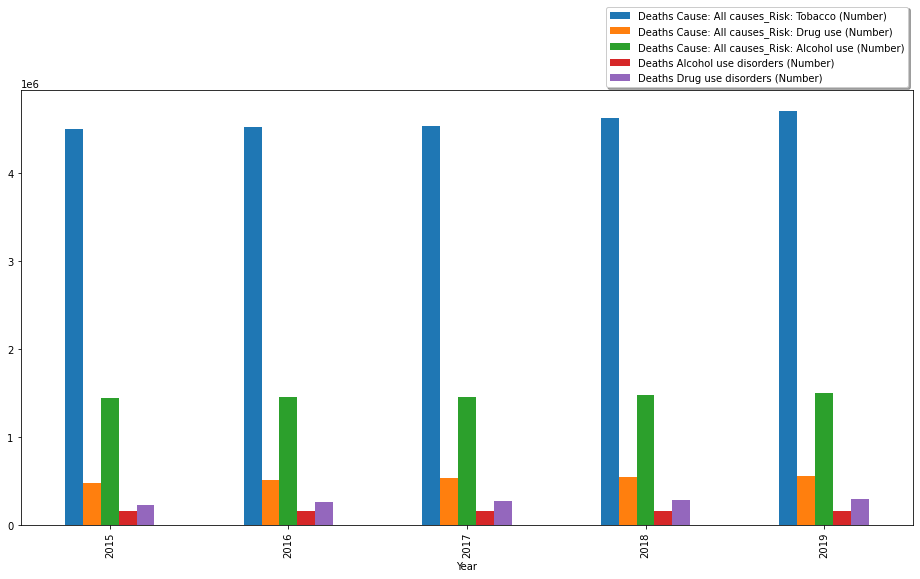

In [381]:
satu.plot(kind='bar', figsize=(16,8))
plt.legend(loc='right', bbox_to_anchor=(1,1.1), shadow=True)

In this problem, I really just want to know the causes of the high mortality rate over the last 5 years. Based on the visualization of this data, we can conclude that in the last five years the largest number of deaths may have occurred due to the risk of tobacco or cigarettes, but what we need to understand here is that the drug category has quite a large number.

---

2. What age has the highest average percentage of deaths due to substance use disorders - alcohol and substance disorders each year?

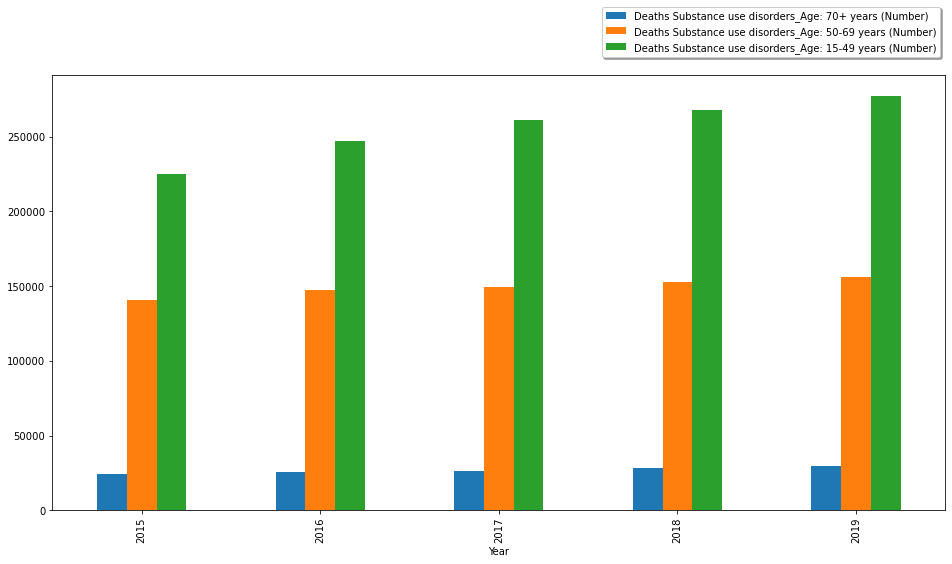

In [365]:
dua_a = analysis.groupby('Year')['Deaths Substance use disorders_Age: 70+ years (Number)', 'Deaths Substance use disorders_Age: 50-69 years (Number)', 'Deaths Substance use disorders_Age: 15-49 years (Number)'].sum()
dua_a.plot(kind='bar', figsize=(16,8))
plt.legend(loc='right', bbox_to_anchor=(1,1.1), shadow=True)

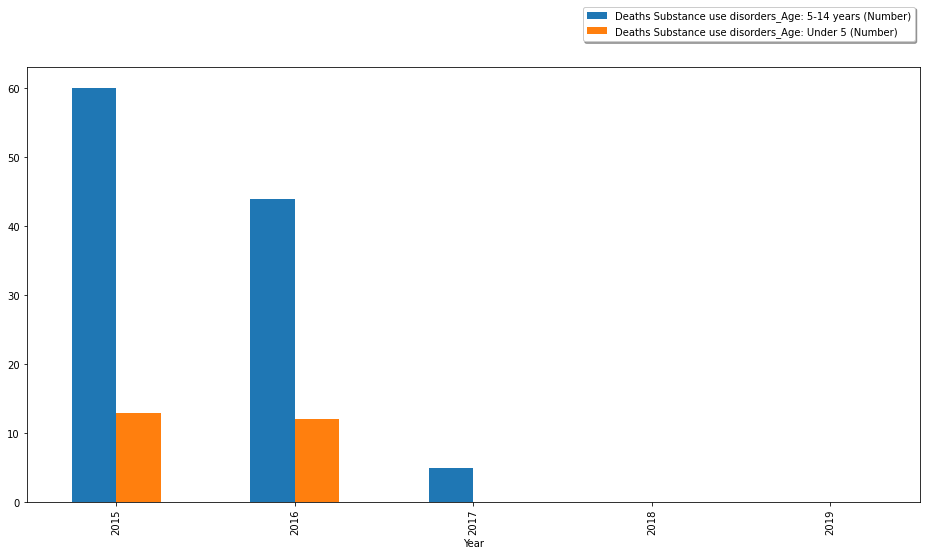

In [366]:
dua_b = analysis.groupby('Year')['Deaths Substance use disorders_Age: 5-14 years (Number)', 'Deaths Substance use disorders_Age: Under 5 (Number)'].sum()
dua_b.plot(kind='bar', figsize=(16,8))
plt.legend(loc='right', bbox_to_anchor=(1,1.1), shadow=True)

At this point, I want to find out which age group has the highest number of deaths from use substance disorders. Based on the results of this data, we can see that the age range of 15 to 49 years has the highest mortality rate due to use substance disorders so that we can focus on the program later for teenagers to adults.

---

3. How has the prevalence of substance use disorders – alcohol and drug addiction – different between men and women in the last five years?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Belarus'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'El Salvador'),
  Text(4, 0, 'Estonia'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'Greenland'),
  Text(7, 0, 'Guatemala'),
  Text(8, 0, 'Kazakhstan'),
  Text(9, 0, 'Latvia'),
  Text(10, 0, 'Lithuania'),
  Text(11, 0, 'Moldova'),
  Text(12, 0, 'Mongolia'),
  Text(13, 0, 'North America (WB)'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Region of the Americas (WHO)'),
  Text(16, 0, 'Russia'),
  Text(17, 0, 'Saint Kitts and Nevis'),
  Text(18, 0, 'Scotland'),
  Text(19, 0, 'Ukraine'),
  Text(20, 0, 'United States'),
  Text(21, 0, 'United States Virgin Islands'),
  Text(22, 0, 'World Bank High Income')])

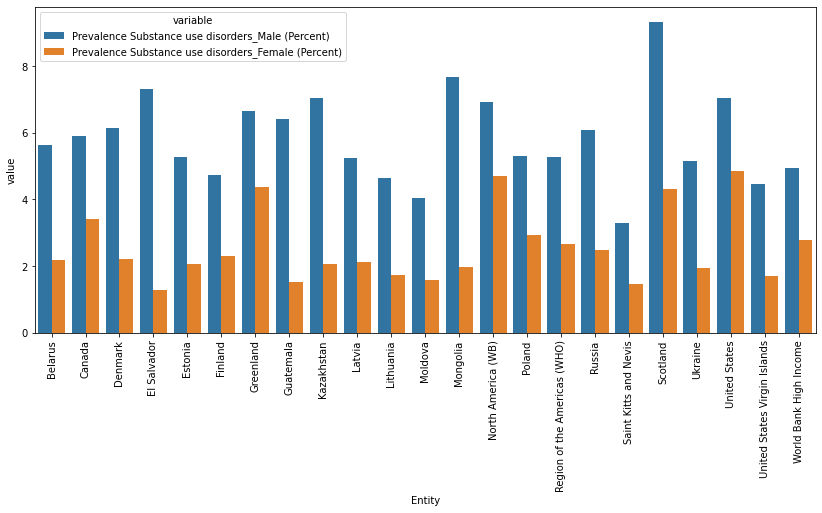

In [367]:
ti = analysis.groupby('Entity')['Prevalence Substance use disorders_Male (Percent)', 'Prevalence Substance use disorders_Female (Percent)'].mean().reset_index()
tiga = pd.melt(ti, id_vars=['Entity'], value_vars=['Prevalence Substance use disorders_Male (Percent)', 'Prevalence Substance use disorders_Female (Percent)'])
plt.figure(figsize=(14, 6))
sns.barplot(data=tiga, x='Entity', y='value', hue='variable')
plt.xticks(rotation=90)

The point of this elaboration is to find out the most use substance disorders of the male or female gender, which we will focus on in the NGO program. Based on the results of this visualization, it is clear that there is a clear difference between the amount of substance abuse from men and women, so we can conclude that most of those who use substance disorders come from men compared to women. In addition, we can get an insight back to Scotland which has the highest graph for use substance disorders from the male gender

---

4. During the last five years, which country has the highest number of users of substance, alcohol, and drug users?

In [382]:
empat = analysis.groupby('Entity')['Prevalence Substance, Alcohol, Drugs use disorders (Percent)'].mean().sort_values()
empat

Entity
Saint Kitts and Nevis           1.592876
Moldova                         1.812870
United States Virgin Islands    2.015684
Lithuania                       2.059691
Ukraine                         2.286902
Finland                         2.364474
Latvia                          2.379053
Estonia                         2.417268
Belarus                         2.483871
Guatemala                       2.544201
World Bank High Income          2.609548
Region of the Americas (WHO)    2.650736
El Salvador                     2.662270
Poland                          2.746916
Russia                          2.776554
Denmark                         2.785598
Kazakhstan                      2.957188
Canada                          3.120962
Mongolia                        3.174936
Greenland                       3.759732
North America (WB)              3.918715
United States                   4.008137
Scotland                        4.588838
Name: Prevalence Substance, Alcohol, Drugs use dis

<AxesSubplot:ylabel='Entity'>

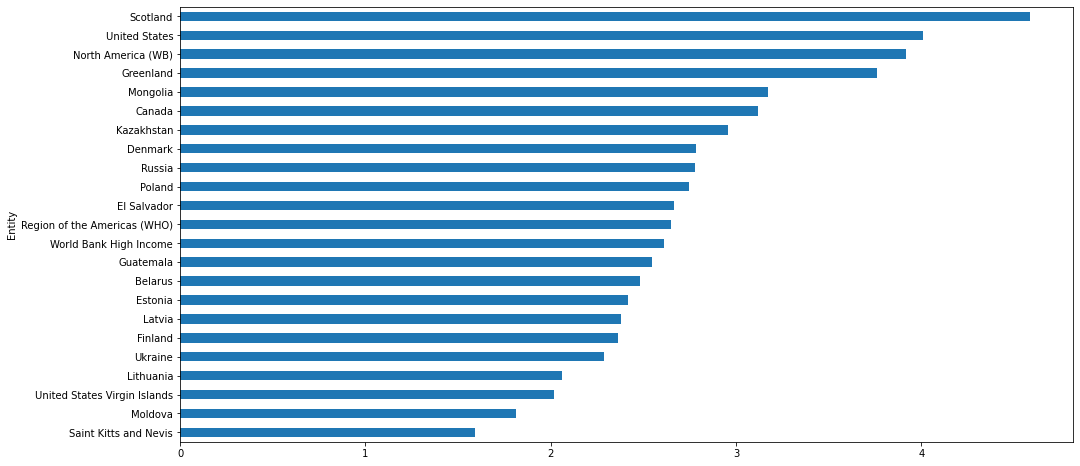

In [383]:
empat.plot(kind='barh', figsize = (16,8))

From the results of this visualization, we can take the point that from 23 countries, Scotland has the highest average percentage of prevalence of substance, alcohol, and drug use disorders with an average of 4.6%

---

5. What type of drug has the highest percentage of deaths in the last five years in the country?

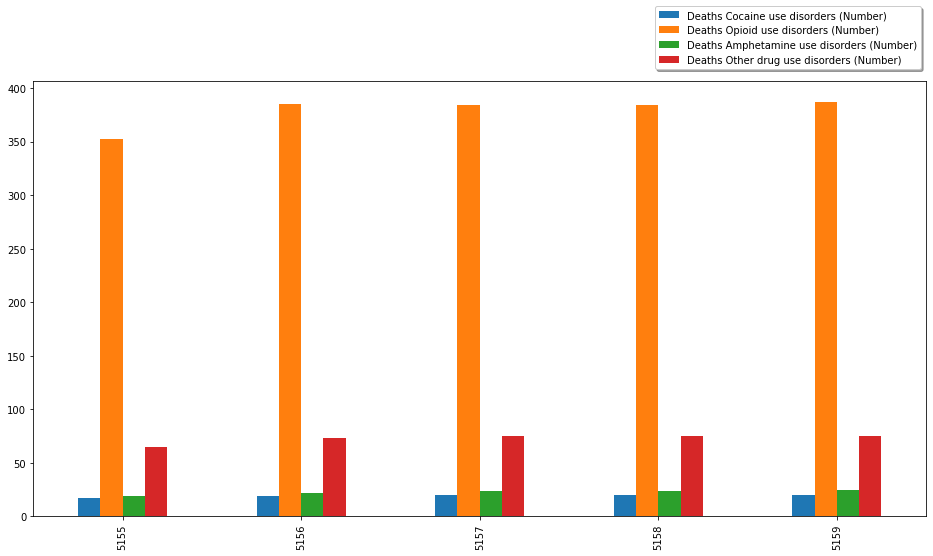

In [369]:
lima = analysis[analysis['Entity'] == 'Scotland'].iloc[:,[10,11,13,12]]
lima.plot(kind='bar', figsize=(16,8))
plt.legend(loc='right', bbox_to_anchor=(1,1.1), shadow=True)

We also need to explore what types of drugs are causing the highest death rate in the country of Scotland. Based on these results, we can conclude that the type of opioid drug has the highest mortality rate, so we need to re-examine this type of drug before implementing the NGO program.

---

6. In what year did Scotland experience a decrease in the average percentage of substance, alcohol, and drug users?

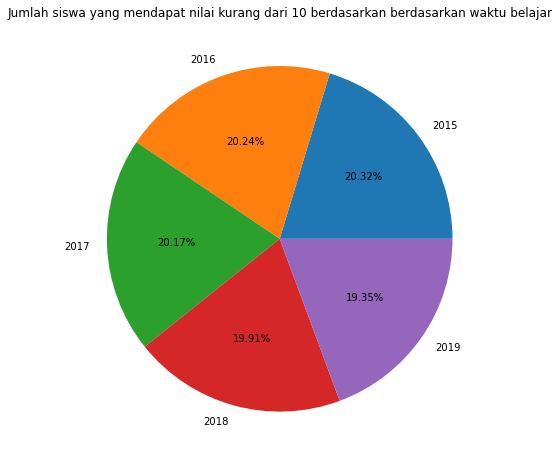

In [370]:
enam = analysis[analysis['Entity'] == 'Scotland'].iloc[:,[1,22]]
fig = plt.figure(figsize=(6,6))
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
year = enam['Year']
use = enam['Prevalence Substance, Alcohol, Drugs use disorders (Percent)']
ax.pie(use,labels=year,autopct='%1.2f%%')
plt.title('Jumlah siswa yang mendapat nilai kurang dari 10 berdasarkan berdasarkan waktu belajar')
plt.show()

At this point of elaboration, I want to analyze the percentage decrease in the number of Prevalence Substance, Alcohol, Drugs use disorders in the last five years in Scotland. We can see from this data visualization, it has decreased every year and in 2019 there was the most decline among other years with 0.56%

---

7. What is the central tendency of this data analysis?

In [390]:
print(" Mean of Substance: " + str(analysis["Prevalence Substance use disorders (Percent)"].mean()))
print(" Median of Substance : " + str(analysis["Prevalence Substance use disorders (Percent)"].median()))
print(" Modus of Substance: " + str(analysis["Prevalence Substance use disorders (Percent)"].mode()[0]))

 Mean of Substance: 4.098115727121893
 Median of Substance : 3.90426125631857
 Modus of Substance: 2.34676444295146


In [393]:
print(" Mean of Alcohol: " + str(analysis["Prevalence Alcohol use disorders (Percent)"].mean()))
print(" Median of Alcohol : " + str(analysis["Prevalence Alcohol use disorders (Percent)"].median()))
print(" Modus of Alcohol: " + str(analysis["Prevalence Alcohol use disorders (Percent)"].mode()[0]))

 Mean of Alcohol: 2.7921795744043245
 Median of Alcohol : 2.4937062113237403
 Modus of Alcohol: 1.54163112731243


In [394]:
print(" Mean of Drug: " + str(analysis["Prevalence Drug use disorders (Percent)"].mean()))
print(" Median of Drug : " + str(analysis["Prevalence Drug use disorders (Percent)"].median()))
print(" Modus of Drug: " + str(analysis["Prevalence Drug use disorders (Percent)"].mode()[0]))

 Mean of Drug: 1.420620481838255
 Median of Drug : 1.13383873053924
 Modus of Drug: 0.37331201939264


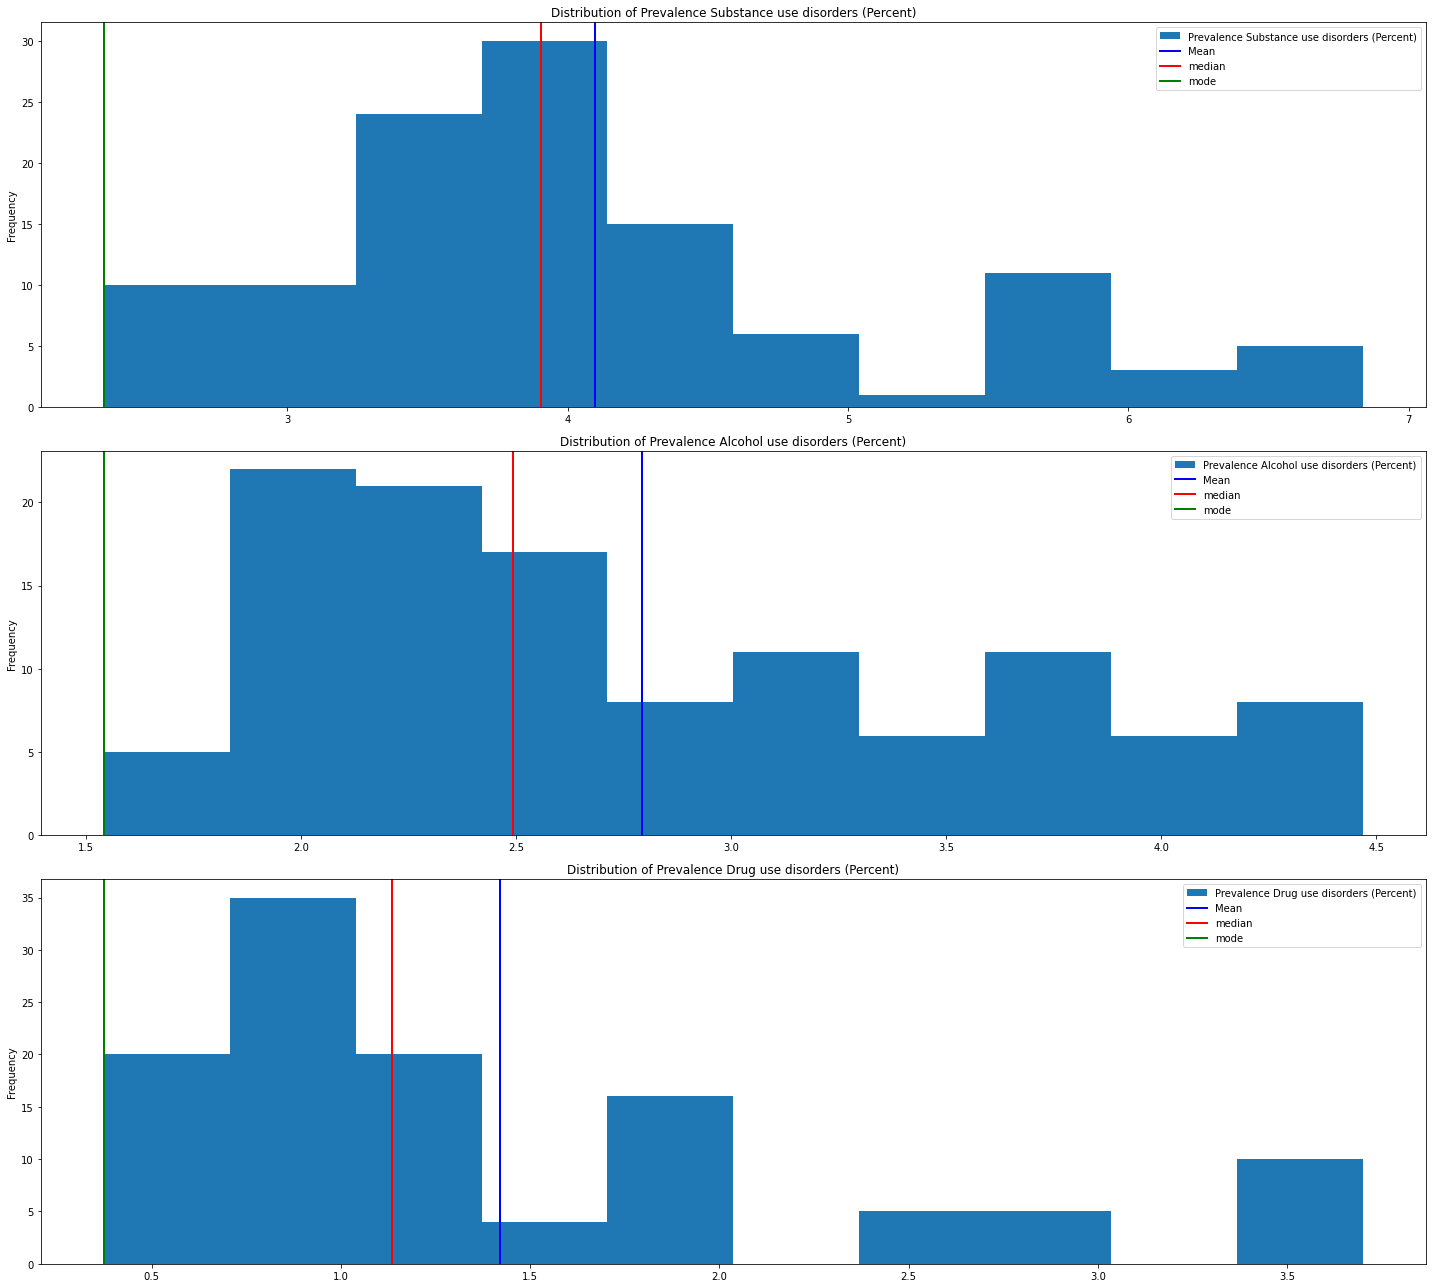

In [395]:
num_column = ['Prevalence Substance use disorders (Percent)', 'Prevalence Alcohol use disorders (Percent)', 'Prevalence Drug use disorders (Percent)']

fig, axes = plt.subplots(3, 1, figsize=(20, 18))
for c, ax in zip(num_column, axes):
    _ = analysis[[c]].plot(kind='hist', ax=ax)
    mean = analysis[c].mean()
    median = analysis[c].median()
    mode = analysis[c].mode()[0]
    ax.axvline(mean, color='blue', linewidth=2, label=f'Mean');
    ax.axvline(median, color='red', linewidth=2, label=f'median');
    ax.axvline(mode, color='green', linewidth=2, label=f'mode');
    ax.set_title(f'Distribution of {c}')
    ax.legend();
    
plt.tight_layout()
plt.savefig('Central Tendency.png')

'Prevalence Substance use disorders_Male (Percent) : Mean : 5.845, Median : 5.671 Mode : 3,242 , the condition is that the mean value is above the median and mode. The data center tends to be in the left area. The mean value is pulled towards the right because the data in the right area is most likely an outlier.

'Prevalence of Alcohol use disorders (Percent): Mean of Alcohol: 2.79, Median of Alcohol: 2.49 Mode of Alcohol: 1.54 , the condition is the mean value is above the median and mode. The data center tends to be in the left area. The mean value is pulled towards the right because the data in the right area is most likely an outlier.

'Prevalence Drug use disorders (Percent)': Mean of Drug: 1.420, Median of Drug : 1.13 Mode of Drug: 0.373, the condition is that the mean value is above the median and mode. The data center tends to be in the left area. The mean value is pulled towards the right because the data in the right area is most likely an outlier.

---

8. Do countries with high rates of alcoholism also have high rates of substance use disorders? Or does a high prevalence in one mean a low prevalence in the other?

In [372]:
delapan = analysis.groupby('Entity')['Prevalence Alcohol use disorders (Percent)', 'Prevalence Drug use disorders (Percent)'].mean()
res = stats.pearsonr(delapan["Prevalence Alcohol use disorders (Percent)"],delapan["Prevalence Drug use disorders (Percent)"])
res

(-0.14412526084008903, 0.5117638558147506)

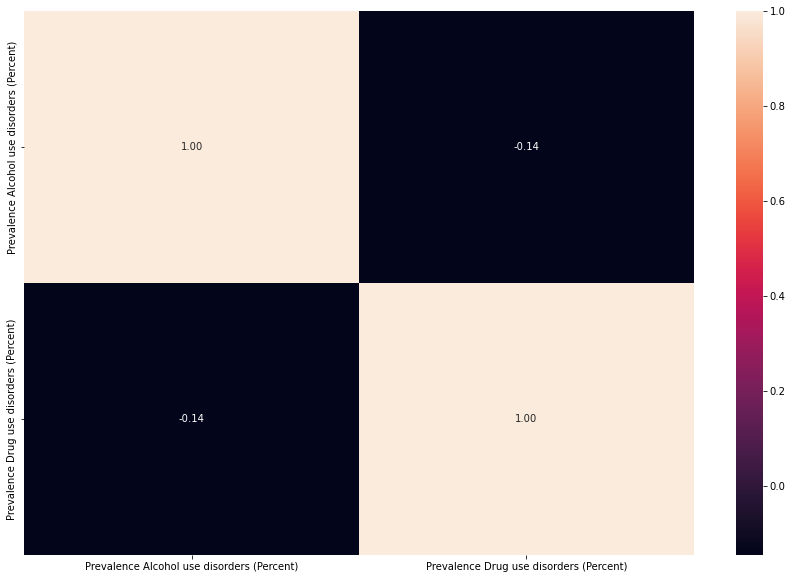

CPU times: total: 172 ms
Wall time: 189 ms


In [373]:
%%time
# Heatmap Correlation

plt.figure(figsize=(15,10))
sns.heatmap(delapan.corr(), annot=True, fmt='.2f')
plt.show()

---

9. Does the average percentage of substance use disorders, alcoholism, and drugs have a significant difference or not in Scotland?

We will perform a hypothesis testing analysis to see if there is a mean difference in the percentages of substance abuse disorders, alcoholism and drugs in Scotland. To find out the difference between the three data, we will use `ANOVA`.

Our hypothesis in this case:

```H0: Substance = Alcohol = Drugs``` 
- The average percentage of substance use disorders, alcoholism, and drugs does not have a significant difference

```H1: Substance != Alcohol != Drugs```
- The average percentage of substance use disorders, alcoholism, and drugs has a significant difference

note : confidence level : **95%** / Critical Value : 1 - 0.95 = **0.05**

In [374]:
substance = analysis[analysis['Entity'] == 'Scotland'].iloc[:,[14]]
alkohol = analysis[analysis['Entity'] == 'Scotland'].iloc[:,[15]]
drugs = analysis[analysis['Entity'] == 'Scotland'].iloc[:,[16]]

In [375]:
f_stat,p_value = stats.f_oneway(substance, alkohol, drugs)
print('P-value:',p_value)

P-value: [7.20190162e-16]


Based on the above results, we can see that the P-value = **7.2e-16** is smaller than our critical value = **0.05**, so we can conclude that **we reject the null hypothesis**, then The average percentage of substance use disorders, alcoholism, and drugs has a significant difference.

In [376]:
scotlandia = pd.concat([substance, alkohol, drugs], axis = 1).reset_index()
scotlandia

,index,Prevalence Substance use disorders (Percent),Prevalence Alcohol use disorders (Percent),Prevalence Drug use disorders (Percent)
0,5155,6.835359,4.452056,2.701143
1,5156,6.807423,4.459768,2.662748
2,5157,6.785153,4.468214,2.632554
3,5158,6.700097,4.381131,2.625466
4,5159,6.516841,4.190921,2.613690


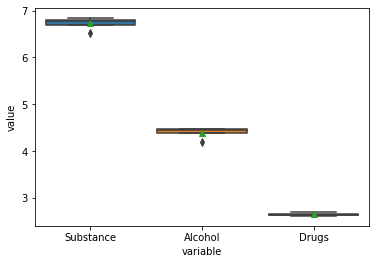

In [377]:
scotlandia.columns = ['index','Substance','Alcohol','Drugs']
scotlandia = pd.melt(scotlandia, id_vars = ['index'], value_vars = ['Substance','Alcohol','Drugs'] )
sns.boxplot(data = scotlandia, x ='variable', y='value',showmeans = True)
plt.savefig('Different of Substance, Alcohol, and Drugs.png')


In addition to the hypothesis testing above, we can visualize the 3 variables so that the differences between the three variables can be clearly seen (Substance, Alcohol, Drugs)

---

# CONCLUSION

Before we jump to conclusions, it is very important to be aware of the data we are dealing with. These data talk about the percentage of deaths caused by various factors, especially substance, alcohol, and drug use disorders from various countries. From the data analysis and calculations that have been carried out, we have gained some insights that we can share. First and foremost, let's talk about the causes of death rates over the past 5 years from different countries. Based on the results of the data that has been analyzed for the cause of death due to use substance disorders has a high enough number so that further analysis is needed. We found that, there are **23** countries that have the highest rates of death due to use substance disorders, so we only focus on 23 countries out of 228 countries. 

Based on our findings, Scotland has the highest number of use substances, alcohol, and drug disorders in terms of gender and percentage of deaths. So I recommend or give advice on countries that are suitable to be used as programs in NGO missions, namely Scotland. Apart from the reason because it has the highest number, another interesting thing is that Scotland always has a decrease in the percentage of deaths caused by use substance, alcohol and drug disorders so that it is relevant to the initial goal of reducing the number of use substance, alcohol, and drug disorders for the next 1 year. .

---

LINK FOR DASHBOARD TABLEAU

https://public.tableau.com/views/Nurrahmawati_Batch002/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link